# Ejercicio de regresion lineal

En este notebook vamos a describir paso a paso un ejercicio de prediccion, a traves de regresion lineal, de la cantidad de ocasiones en que se comparte un articulo del area de machine Learning en un Blog.

## Prediccion: Cantidad de ocasiones en que se comparte un Blog

Se inicia importando, ajustando y visualizando los datos.

In [1]:
# Importando librerias y ajustes necesarios.

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Se carga el archivo de datos de entradas csv como dataset de Pandas. Los datos provienen del sitio web
data= pd.read_csv("./articulos de blog ml.csv")

Pandas es una libreria de python destinada a analisis de datos, que proporciona estructuras de datos felxibles las cuales permiten trabajar con ellos de forma eficiente. Pandas ofrece las siguientes estructuras de datos: Serires: Son arrays con indexacion (arrays con indice o etiquetados), similar a los diccionarios. Puede generarse a partir de diccionarios de las listas. Dataframe: Son estructuras de datos similares a las tablas de base de datos relaciones con SQL. Pane, Panel4D y PnaelND:Son estructuras de datos que permiten trabajar conm mas de 2 dimensiones 

In [3]:
#Revisamos la dimension (registros x columnas) que contiene el archivo
data.shape

(161, 8)

In [4]:
#Podemos revisar los primeros registros para comprobar el funcionamiento.
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Vemos que algunos atributos (columnas) tienen valores nulos NaN; por ejemplo, en el atributo "uri" en este caso el atributo share sera la salida, es decir, el valor "y" del modelo regresion lineal, el valor se desea predecir.

In [5]:
# Se realiza estadistica descriptiva para tener un contexto inicial de datos:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


se observa, por ejemplo, la media del atributo word count (cantidad de palabras) es de 1808.26 tambien se observa que el articulo mas pequeño contiene 250 palabras y el mas grande tiene 8401 palabras. con respecto a cuanto se ha compartido un articulo (#share), si existe los que nunca se han compartido (o veces) y los mas recurrentes con 350,000 ocaciones (muy popular)

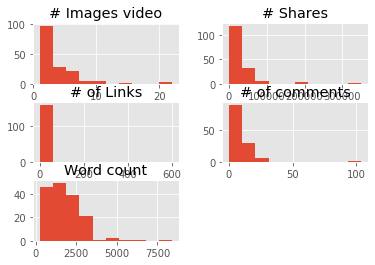

In [6]:
#se visualizan, los atributos de entrada mediante histogramas y barras (cuantitativas y cualitativas)
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

las graficas anteriores comunican entre que valores se concentran la mayoria de los registros. seguidamente se filtran los datos por cantidad de palabras dejandonos los registros con menos de 3500 palabras y tambien #share con menos de 80.00

# se puede visualizar por ejemplo cantidad de palabras vs compartidos

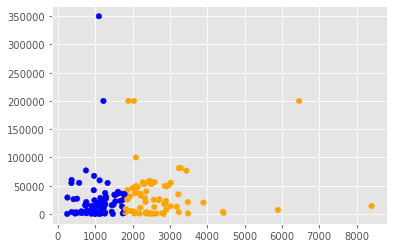

In [7]:
#Visualizar datos de entrada
colores = ['orange','blue']
tamanios=[30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

#Pintar en 2 colores los puntos por debajo de la media de cantidad de palabras
asignar =[]
for index,row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

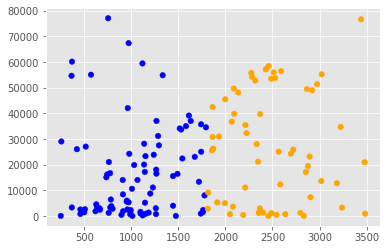

In [9]:
# VISUALIZAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

## regresion lineal simple (1 atributo con python y SKLearn)

In [ ]:
# Se asigna el articulo de entrada x para el entrenamiento y las etiquetas Y
dataX= filtered_data[["Word count"]]
X_train=np.array(dataX)
Y_train=filtered_data['# Shares'].values


In [12]:
# Se regenera el objeto de regresion lineal 
regr = linear_model.Linearregression()

# se entre el modelo

regr.fit(X_train, Y_train)

#se realizan las predicciones

y_pred=regr.predict(X_train)

#se revisa los coeficientes obtenidos, en este casosera la tangente 

print('coeficientes: \n', regr.coef_)
#este es el valor donde corta el eje Y(en x=0)
print('termino independiente: \n', regr.intercept_)
#error de cuadrado medio
print('Media del error cuadrado %.2f' % mean_squared_error(Y_train,y_pred))
#puntaje de varianza. El mejor puntaje es de 1.0 
print('Puntaje de varianza:%2.f'% r2_score(Y_train,y_pred))

AttributeError: module 'sklearn.linear_model' has no attribute 'Linearregression'